# Phát hiện Phishing URL 
Hiện nay các cuộc tấn công mạng nhắm vào người dùng xảy ra ngày càng nhiều và trầm trọng. Nếu quay về chục năm trước, khi internet chưa được phổ biến như bây giờ, chỉ có những người thật sự giỏi và am hiểu mới có thể sử dụng các kỹ thuật để tấn công nhằm đánh cắp 1 thông tin nào đó thông qua internet. Nhưng đến thời điểm hiện tại, internet được phổ biến khắp nơi dẫn đến việc người dùng có thể bị đánh cắp thông tin bất cứ lúc nào. Có một cách đơn giản và không cần được đào tạo bài bản cũng có thể dùng để lừa đảo, tấn công đánh cắp thông tin cá nhân. Đó chính là URL Phising, hay hiểu đơn giản là lừa người dùng bấm vào đường dẫn (URL), điền thông tin các nhân vào phần đăng nhập,... khi đó kẻ tấn công sẽ có tất cả thông tin người dùng nhập vào mà không tốn tí sức lực nào! Để ngăn chặn điều đó, mô hình học máy dưới đây sẽ được huấn luyện để giúp chúng ta phân biệt và chọn lọc ra các đường dẫn (URL) an toàn.

Các bước thực hiện:

1. Đọc dữ liệu từ file csv
2. Trực quan hóa dữ liệu
3. Tách dữ liệu - chọn lọc các đặc trưng cần thiết
4. Đào tạo dữ liệu 
5. So sánh mô hình
6. Kết luận

In [1]:
#Thêm các thư viện cần thiết

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# 1. Đọc dữ liệu từ file csv:
Tập dữ liệu được lấy từ trang Kaggle: https://www.kaggle.com/eswarchandt/phishing-website-detector .

Tập dữ liệu có hơn 11.000 đường dẫn (URL) với 32 đặc trưng giúp phân biệt đường dẫn có an toàn hay không (Nếu trạng thái là 1: an toàn, -1: nguy hiểm)

In [2]:
#Tải dữ liệu vào khung (Dataframe)

data = pd.read_csv("phishing.csv")
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


Xem xét dữ liệu và các đặc trưng của khung (dataframe)

In [3]:
#Khối của khung dữ liệu (dataframe)

data.shape

(11054, 32)

In [4]:
#Danh sách các đặc trưng của tập dữ liệu

data.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [5]:
#Thông tin về tập dữ liệu

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

In [6]:
# giá trị duy nhất trong cột

data.nunique()

Index                  11054
UsingIP                    2
LongURL                    3
ShortURL                   2
Symbol@                    2
Redirecting//              2
PrefixSuffix-              2
SubDomains                 3
HTTPS                      3
DomainRegLen               2
Favicon                    2
NonStdPort                 2
HTTPSDomainURL             2
RequestURL                 2
AnchorURL                  3
LinksInScriptTags          3
ServerFormHandler          3
InfoEmail                  2
AbnormalURL                2
WebsiteForwarding          2
StatusBarCust              2
DisableRightClick          2
UsingPopupWindow           2
IframeRedirection          2
AgeofDomain                2
DNSRecording               2
WebsiteTraffic             3
PageRank                   2
GoogleIndex                2
LinksPointingToPage        3
StatsReport                2
class                      2
dtype: int64

In [7]:
#xóa cột index

data = data.drop(['Index'],axis = 1)

In [8]:
#Mô tả tập dữ liệu

data.describe().T

,count,mean,std,min,25%,50%,75%,max
UsingIP,11054.0,0.313914,0.949495,-1.0,-1.0,1.0,1.0,1.0
LongURL,11054.0,-0.633345,0.765973,-1.0,-1.0,-1.0,-1.0,1.0
ShortURL,11054.0,0.738737,0.674024,-1.0,1.0,1.0,1.0,1.0
Symbol@,11054.0,0.700561,0.713625,-1.0,1.0,1.0,1.0,1.0
Redirecting//,11054.0,0.741632,0.670837,-1.0,1.0,1.0,1.0,1.0
PrefixSuffix-,11054.0,-0.734938,0.678165,-1.0,-1.0,-1.0,-1.0,1.0
SubDomains,11054.0,0.064049,0.817492,-1.0,-1.0,0.0,1.0,1.0
HTTPS,11054.0,0.251040,0.911856,-1.0,-1.0,1.0,1.0,1.0
DomainRegLen,11054.0,-0.336711,0.941651,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11054.0,0.628551,0.777804,-1.0,1.0,1.0,1.0,1.0


TẬP DỮ LIỆU:
1. Có 11054 trường hợp với 31 đặc trưng. 
2. Trong đó có 30 đặc trưng độc lập và 1 đặc trưng phụ thuộc
3. Các đặc trưng đều có kiểu dữ liệu int nên không cần sử dụng LabelEncoder
4. Không có ngoại lệ trong tập dữ liệu
5. Không có dữ liệu bị thiếu

# Trực quan hóa dữ liệu

Một số sơ đồ và đồ thị được hiển thị để tìm hiểu cách phân phối dữ liệu và cách các đặc trưng có liên quan với nhau.

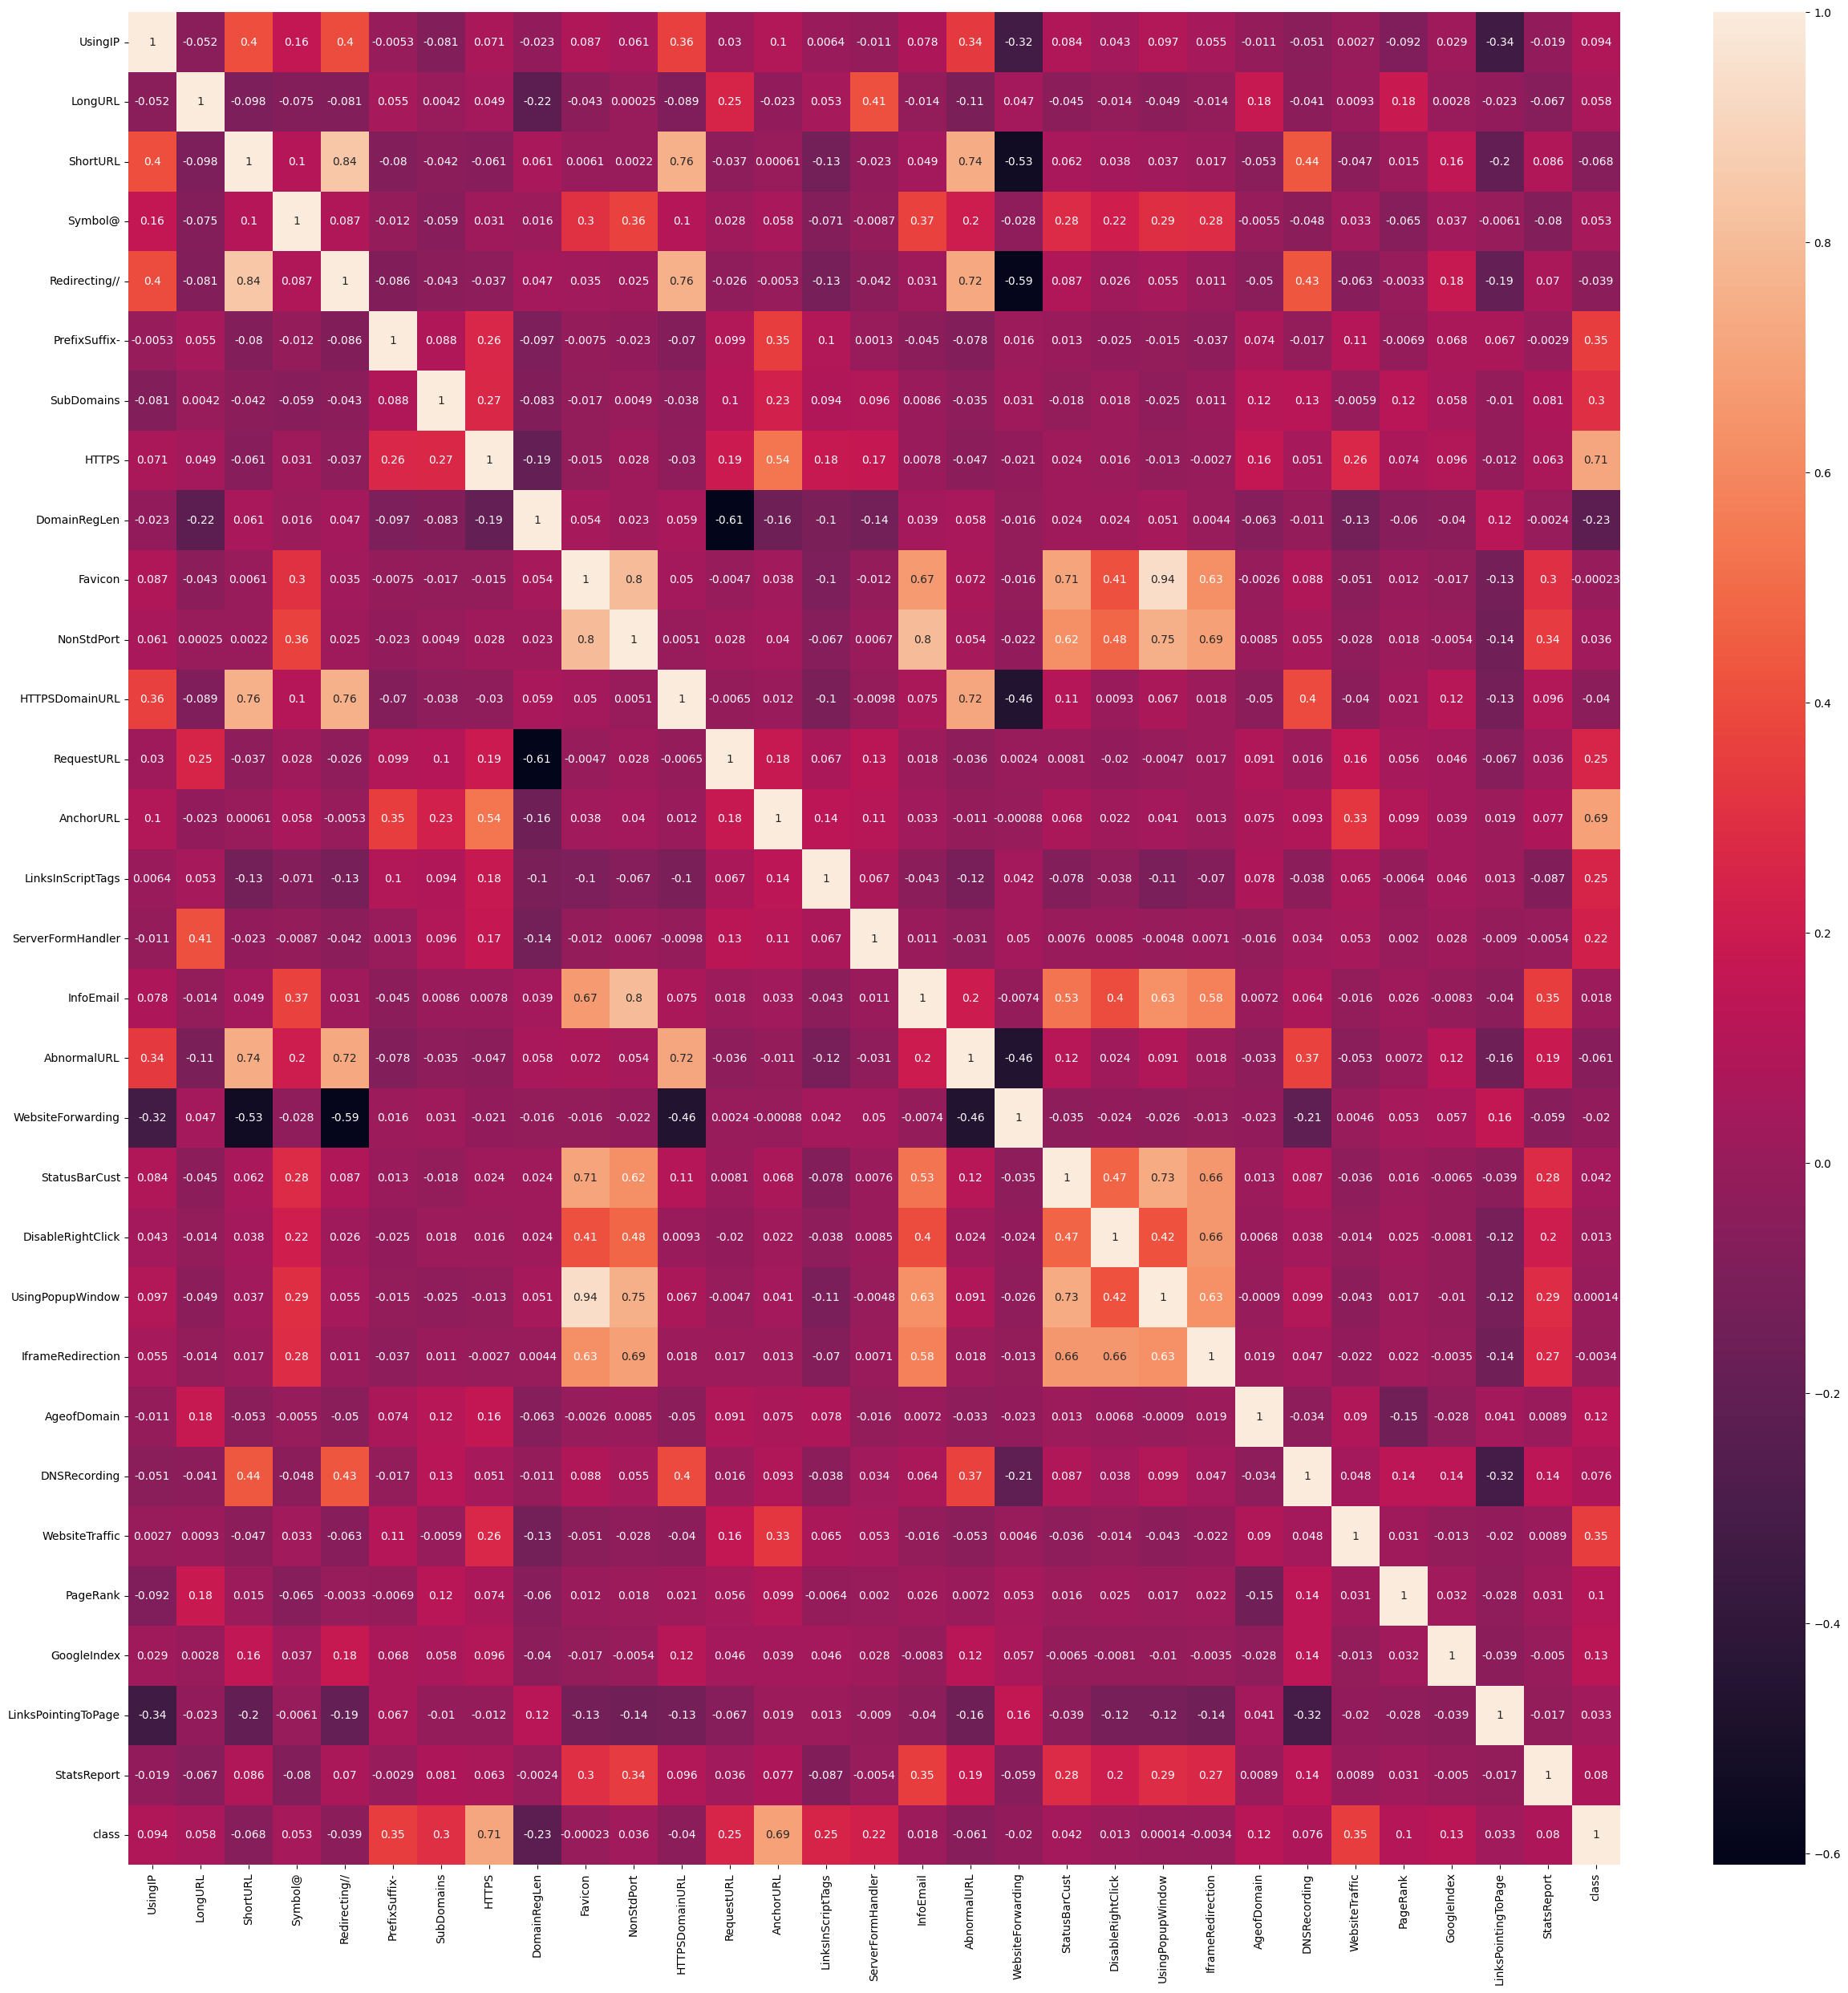

In [60]:
#Bản đồ nhiệt để hiện sự tương quan giữa các dữ liệu, đặc trưng

plt.figure(figsize=(30,30))
sns.heatmap(data.corr(), annot=True)
plt.show()

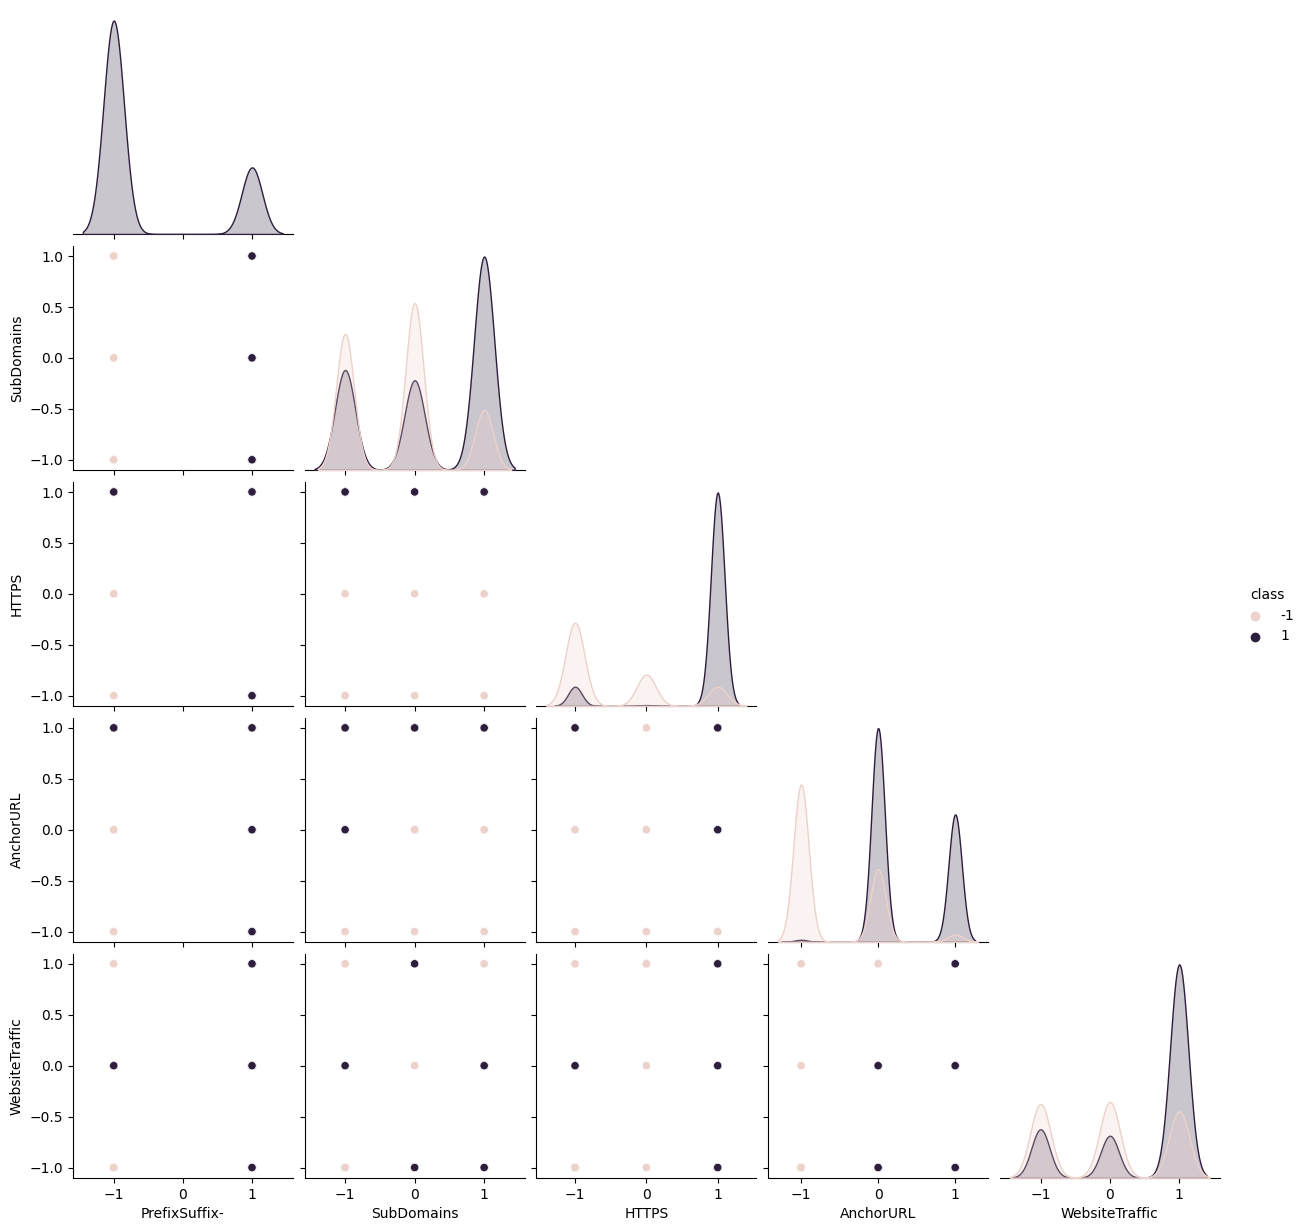

In [61]:
#Biểu đồ cặp cho các đặc trưng cụ thể

df = data[['PrefixSuffix-', 'SubDomains', 'HTTPS','AnchorURL','WebsiteTraffic','class']]
sns.pairplot(data = df,hue="class",corner=True);

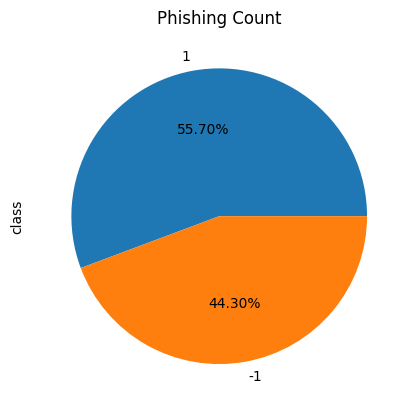

In [11]:
# Số lượng trường hợp lừa đảo (phising) trong tập dữ liệu

data['class'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

# Tách dữ liệu
Tập dữ liệu được chia làm 2 phần theo tỉ lệ 80%-20%. Trong đó 80% cho tập huấn luyện và 20% cho tập kiểm tra

In [12]:
# Tách dữ liệu thành đặc trưng độc lập và phụ thuộc

X = data.drop(["class"],axis =1)
y = data["class"]

In [13]:
# Chia tập dữ liệu thành 2 tập: tập huấn luyện (80%) và tập kiểm tra (20%)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8843, 30), (8843,), (2211, 30), (2211,))

# Xây dựng và đào tạo mô hình
Học máy có giám sát là một trong những loại học máy được sử dụng phổ biến và thành công nhất. Học có giám sát được sử dụng bất cứ khi nào ta muốn dự đoán một kết quả/nhãn nhất định từ một tập hợp các đặc trưng nhất định và có các ví dụ về các cặp nhãn đặc trưng. Ta xây dựng mô hình học máy từ các cặp nhãn đặc trưng này, bao gồm tập huấn luyện ở trên. Mục tiêu là đưa ra dự đoán chính xác cho dữ liệu mới, chưa từng thấy trước đây.

Có hai loại vấn đề chính về học máy có giám sát, được gọi là phân loại và hồi quy. Các mô hình học máy có giám sát (hồi quy) được coi là để huấn luyện tập dữ liệu trong sổ tay này là:
1. Random Forest
2. SVM
3. Gradient Boost Classifier

In [14]:
# Tạo các mảng để lưu trữ kết quả
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

# Chức năng để lưu trữ kết quả
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

# Random Forest
"Rừng ngẫu nhiên" là một thuật toán học máy phổ biến thuộc kỹ thuật học có giám sát. Nó có thể được sử dụng cho cả bài toán Phân loại và Hồi quy trong ML. Nó dựa trên khái niệm học tập tổng hợp, là một quá trình kết hợp nhiều bộ phân loại để giải quyết một vấn đề phức tạp và cải thiện hiệu suất của mô hình.

In [93]:
# Thêm thư viện về mô hình phân loại "Rừng ngẫu nhiên"
from sklearn.ensemble import RandomForestClassifier

# Khởi tạo mô hình
rf = RandomForestClassifier(n_estimators=10)

# Phù hợp với mô hình
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [94]:
# Dự đoán giá trị mục tiêu của mô hình cho các mẫu
y_train_forest = rf.predict(X_train)
y_test_forest = rf.predict(X_test)

In [95]:
#Tính toán {accuracy(độ chính xác), f1_score, Recall, precision} hiệu suất của mô hình

acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_forest)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))

Random Forest : Accuracy on training Data: 0.991
Random Forest : Accuracy on test Data: 0.967

Random Forest : f1_score on training Data: 0.991
Random Forest : f1_score on test Data: 0.971

Random Forest : Recall on training Data: 0.992
Random Forest : Recall on test Data: 0.972

Random Forest : precision on training Data: 0.990
Random Forest : precision on test Data: 0.970


In [96]:
# Tính toán báo cáo phân loại của mô hình

print(metrics.classification_report(y_test, y_test_forest))

              precision    recall  f1-score   support

          -1       0.96      0.96      0.96       976
           1       0.97      0.97      0.97      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



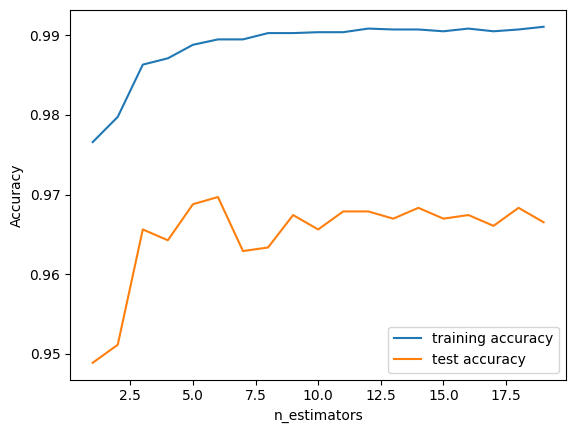

In [97]:
training_accuracy = []
test_accuracy = []
# thử max_depth từ 1 đến 20
depth = range(1,20)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(X_train, y_train)
    # ghi lại độ chính xác của tập huấn luyện
    training_accuracy.append(forest_test.score(X_train, y_train))
    # ghi lại độ chính xác của tập kiểm tra
    test_accuracy.append(forest_test.score(X_test, y_test))
    

# vẽ đồ thị độ chính xác tập huấn luyện và tập kiểm tra cho n_estimators từ 1 đến 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();

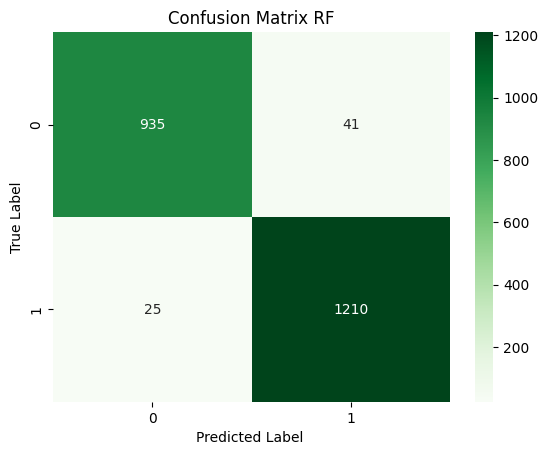

In [51]:
# Vẽ biểu đồ hỗn loạn
rf_conf_matrix = confusion_matrix(y_test,y_test_forest)
rf_conf_matrix
sns.heatmap(rf_conf_matrix,annot=True, fmt = 'd',cmap='Greens')
plt.xlabel('Predicted Label ')
plt.ylabel('True Label')
plt.title('Confusion Matrix RF')
plt.show()

Biểu đồ trên cho thấy có:

1. TP (Giá trị tích cực - an toàn): 1198 trường hợp
2. FP (Giá trị tiêu cực nhưng được đánh giá là tích cực -> Lỗi loại I): 37 trường hợp
3. FN (Giá trị tích cực nhưng được đánh giá là tiêu cực -> Lỗi loại II): 42 trường hợp
4. TN (Giá trị tiêu cực - nguy hiểm): 934 trường hợp

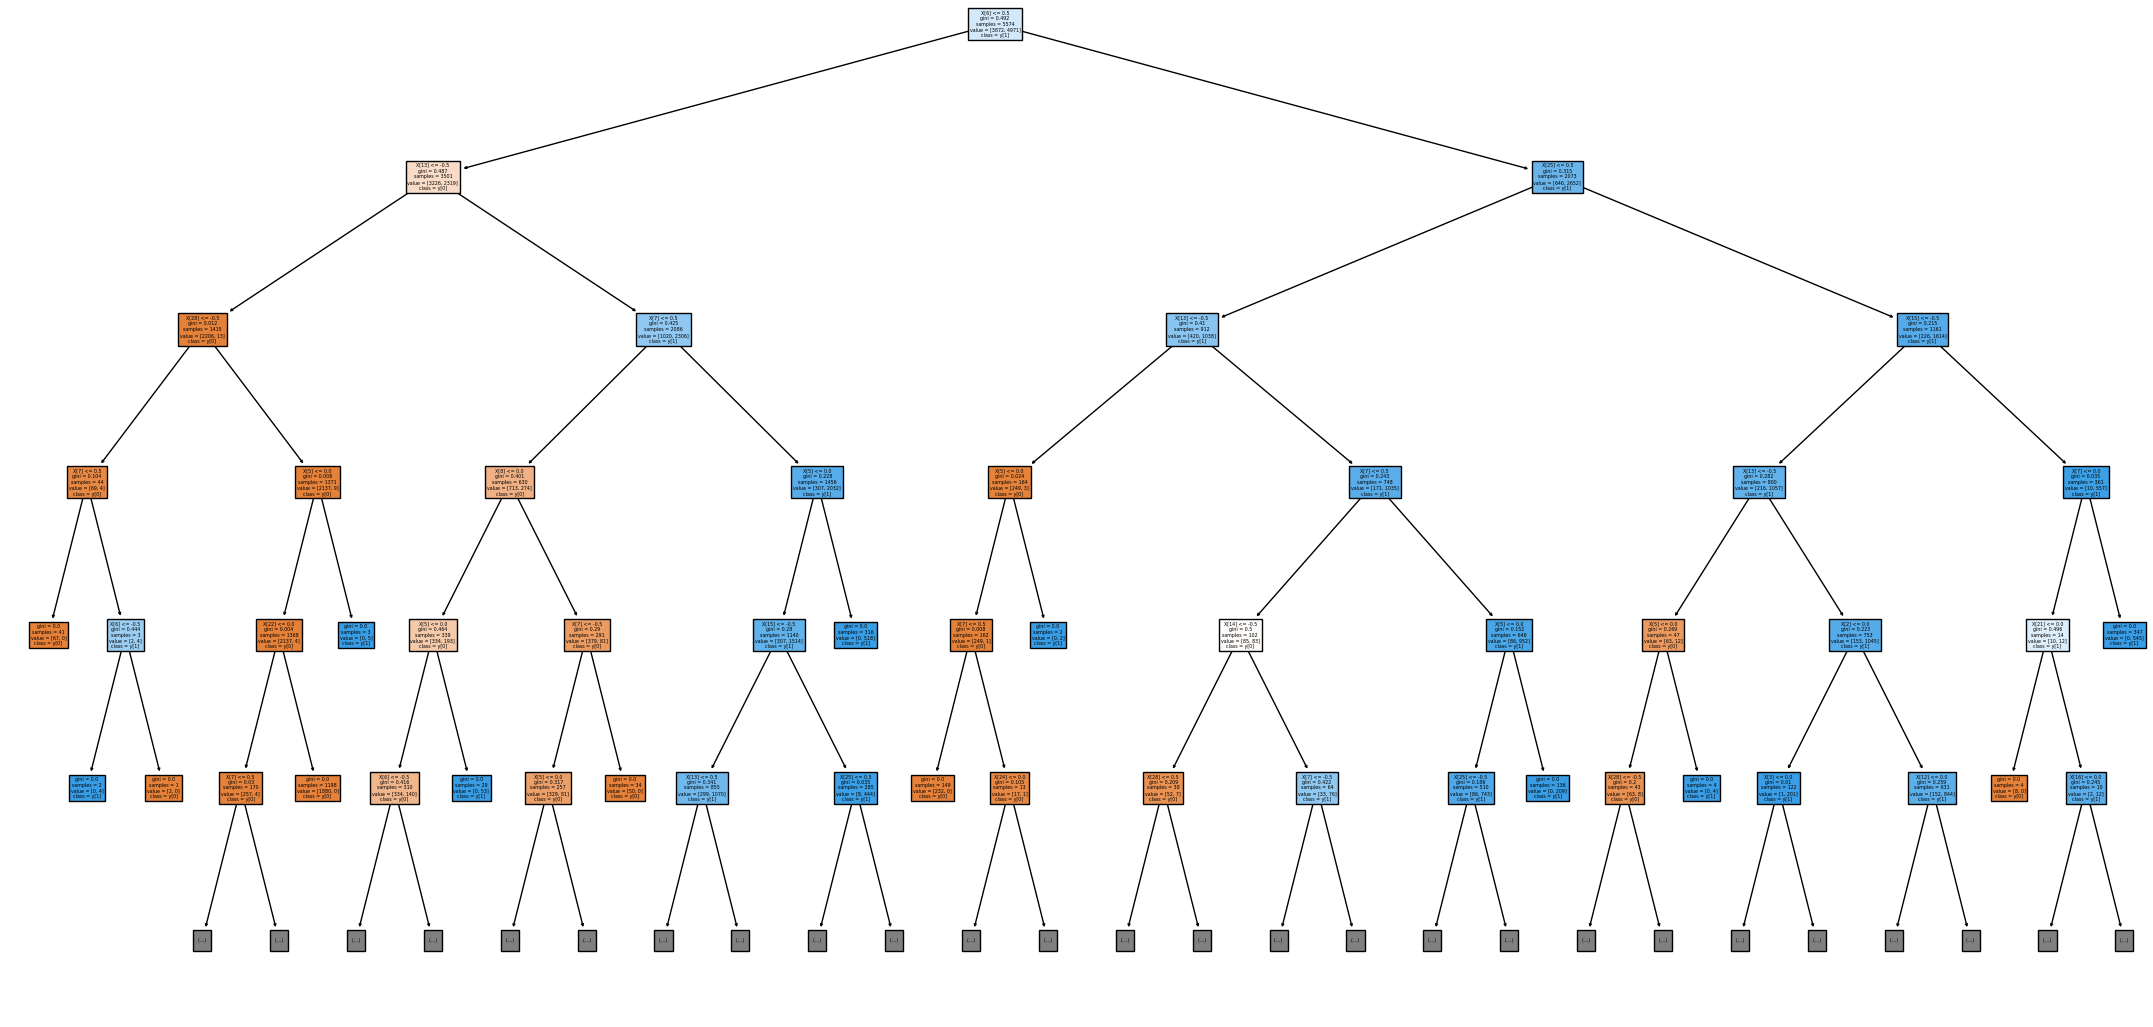

In [55]:
from sklearn.tree import plot_tree

# Visualize the first tree in the forest
plt.figure(figsize=(20,10))
plot_tree(rf.estimators_[0], filled=True, class_names=True, max_depth=5)
plt.show()

In [81]:
#lưu trữ kết quả. Cần truyền tham số theo đúng thứ tự dưới đây.

storeResults('Random Forest',acc_test_forest,f1_score_test_forest,
             recall_score_train_forest,precision_score_train_forest)

In [98]:
import pickle

# Truyền thông tin mô hình RF vào tệp
pickle.dump(rf, open('pickle/model_rf.pkl', 'wb'))

# Support Vector Machine (SVM)
Support Vector Machine hoặc SVM là một trong những thuật toán Học có giám sát phổ biến nhất, được sử dụng cho các vấn đề Phân loại cũng như Hồi quy. Mục tiêu của thuật toán SVM là tạo ra đường ranh giới quyết định hoặc đường tốt nhất có thể phân tách không gian n chiều thành các lớp để chúng ta có thể dễ dàng đưa điểm dữ liệu mới vào đúng danh mục trong tương lai.

In [68]:
# Thêm thư viện mô hình Support Vector Classifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Xác định phạm vi tham số

# Tham số gamma xác định mức độ ảnh hưởng của một ví dụ huấn luyện duy nhất
# Với các giá trị thấp có nghĩa là 'xa' và giá trị cao có nghĩa là 'gần'.

# Hàm kernel:Có tính đối xứng
# linear: Phân tách dữ liệu bằng 1 đường duy nhất
# rbf: Dữ liệu được tạo ra một cách đối xứng, đường phân lớp tìm được cũng tạo ra các vùng đối xứng với mỗi class.
param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}

svm = GridSearchCV(SVC(probability=True), param_grid)

# Điều chỉnh mô hình tìm kiếm
svm.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'gamma': [0.1], 'kernel': ['rbf', 'linear']})

In [69]:
# Dự đoán giá trị mục tiêu của mô hình cho các mẫu
y_train_svm = svm.predict(X_train)
y_test_svm = svm.predict(X_test)

In [70]:
#Tính toán {accuracy(độ chính xác), f1_score, Recall, precision} hiệu suất của mô hình

acc_train_svm = metrics.accuracy_score(y_train,y_train_svm)
acc_test_svm = metrics.accuracy_score(y_test,y_test_svm)
print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(acc_test_svm))
print()

f1_score_train_svm = metrics.f1_score(y_train,y_train_svm)
f1_score_test_svm = metrics.f1_score(y_test,y_test_svm)
print("Support Vector Machine : f1_score on training Data: {:.3f}".format(f1_score_train_svm))
print("Support Vector Machine : f1_score on test Data: {:.3f}".format(f1_score_test_svm))
print()

recall_score_train_svm = metrics.recall_score(y_train,y_train_svm)
recall_score_test_svm = metrics.recall_score(y_test,y_test_svm)
print("Support Vector Machine : Recall on training Data: {:.3f}".format(recall_score_train_svm))
print("Support Vector Machine : Recall on test Data: {:.3f}".format(recall_score_test_svm))
print()

precision_score_train_svm = metrics.precision_score(y_train,y_train_svm)
precision_score_test_svm = metrics.precision_score(y_test,y_test_svm)
print("Support Vector Machine : precision on training Data: {:.3f}".format(precision_score_train_svm))
print("Support Vector Machine : precision on test Data: {:.3f}".format(precision_score_test_svm))

Support Vector Machine : Accuracy on training Data: 0.969
Support Vector Machine : Accuracy on test Data: 0.964

Support Vector Machine : f1_score on training Data: 0.973
Support Vector Machine : f1_score on test Data: 0.968

Support Vector Machine : Recall on training Data: 0.980
Support Vector Machine : Recall on test Data: 0.980

Support Vector Machine : precision on training Data: 0.965
Support Vector Machine : precision on test Data: 0.957


In [71]:
# Tính toán báo cáo phân loại của mô hình

print(metrics.classification_report(y_test, y_test_svm))

              precision    recall  f1-score   support

          -1       0.97      0.94      0.96       976
           1       0.96      0.98      0.97      1235

    accuracy                           0.96      2211
   macro avg       0.97      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



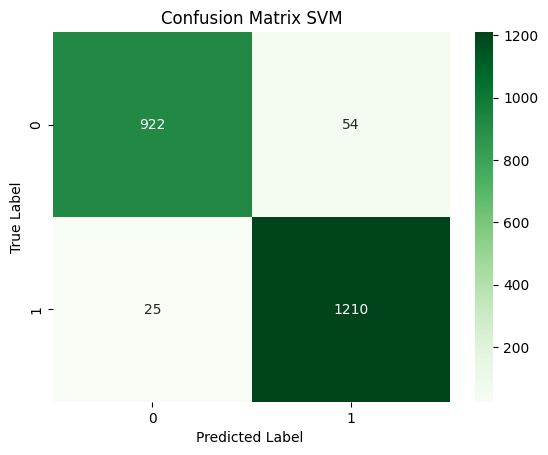

In [72]:
# Vẽ biểu đồ hỗn loạn
svm_conf_matrix = confusion_matrix(y_test,y_test_svm)
svm_conf_matrix
sns.heatmap(svm_conf_matrix,annot=True, fmt = 'd',cmap='Greens')
plt.xlabel('Predicted Label ')
plt.ylabel('True Label')
plt.title('Confusion Matrix SVM')
plt.show()

Biểu đồ trên cho thấy có:

1. TP (Giá trị tích cực - an toàn): 1209 trường hợp
2. FP (Giá trị tiêu cực nhưng được đánh giá là tích cực -> Lỗi loại I): 26 trường hợp
3. FN (Giá trị tích cực nhưng được đánh giá là tiêu cực -> Lỗi loại II): 89 trường hợp
4. TN (Giá trị tiêu cực - nguy hiểm): 887 trường hợp

In [73]:
#lưu trữ kết quả. Cần truyền tham số theo đúng thứ tự dưới đây.

storeResults('Support Vector Machine',acc_test_svm,f1_score_test_svm,
             recall_score_train_svm,precision_score_train_svm)

In [83]:
import pickle

# Truyền thông mô hình SVM tin vào tệp
pickle.dump(svm, open('pickle/model_svm.pkl', 'wb'))

# Gradient Boosting Classifier
Gradient Boosting Classifier - "Bộ phân loại tăng cường độ dốc" là một nhóm các thuật toán học máy kết hợp nhiều mô hình học yếu với nhau để tạo ra một mô hình dự đoán mạnh. Cây quyết định thường được sử dụng khi thực hiện tăng cường độ dốc. Các thuật toán tăng cường đóng một vai trò quan trọng trong việc xử lý sự đánh đổi phương sai sai lệch. Không giống như các thuật toán bao đóng, chỉ kiểm soát phương sai cao trong mô hình, tăng cường kiểm soát cả hai khía cạnh (độ lệch và phương sai) và được coi là hiệu quả hơn.

In [74]:
# Thêm mô hình huấn luyện có giám sát Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# Khởi tạo mô hình
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# Điều chỉnh mô hình
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [75]:
# Dự đoán giá trị mục tiêu của mô hình cho các mẫu
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

In [76]:
#Tính toán {accuracy(độ chính xác), f1_score, Recall, precision} hiệu suất của mô hình

acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc)
recall_score_test_gbc =  metrics.recall_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boosting Classifier : Recall on test Data: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boosting Classifier : precision on test Data: {:.3f}".format(precision_score_test_gbc))

Gradient Boosting Classifier : Accuracy on training Data: 0.989
Gradient Boosting Classifier : Accuracy on test Data: 0.974

Gradient Boosting Classifier : f1_score on training Data: 0.990
Gradient Boosting Classifier : f1_score on test Data: 0.977

Gradient Boosting Classifier : Recall on training Data: 0.994
Gradient Boosting Classifier : Recall on test Data: 0.989

Gradient Boosting Classifier : precision on training Data: 0.986
Gradient Boosting Classifier : precision on test Data: 0.966


In [77]:
# Tính toán báo cáo phân loại của mô hình

print(metrics.classification_report(y_test, y_test_gbc))

              precision    recall  f1-score   support

          -1       0.99      0.96      0.97       976
           1       0.97      0.99      0.98      1235

    accuracy                           0.97      2211
   macro avg       0.98      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



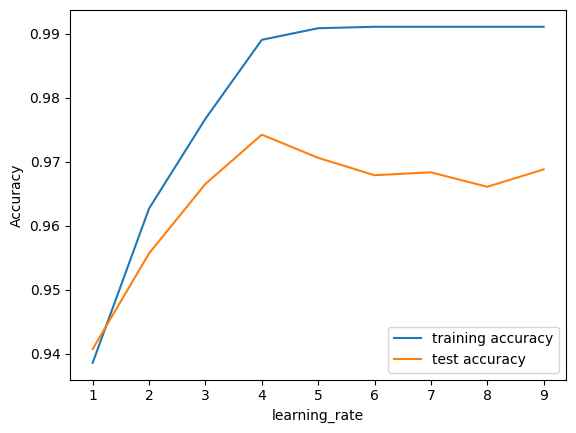

In [78]:
# Khởi tạo training_accuracy = []
training_accuracy = []
test_accuracy = []
# Thử learning_rate trong khoảng khoảng từ 0.1 đến 0.9
depth = range(1,10,1)
for n in depth:
    forest_test =  GradientBoostingClassifier(max_depth=n,learning_rate = 0.7)

    forest_test.fit(X_train, y_train)
    # Ghi lại độ chính xác của tập huấn luyện
    training_accuracy.append(forest_test.score(X_train, y_train))
    # Ghi lại độ chính xác tổng quát hóa
    test_accuracy.append(forest_test.score(X_test, y_test))
    

# Vẽ đồ thị độ chính xác huấn luyện và kiểm tra cho n_estimators từ 1 đến 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

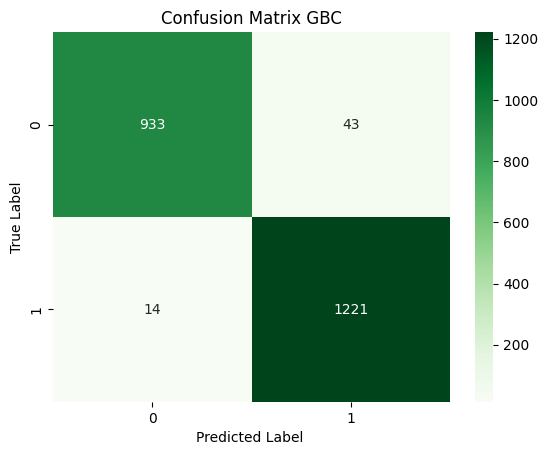

In [79]:
# Vẽ biểu đồ hỗn loạn
gbc_conf_matrix = confusion_matrix(y_test,y_test_gbc)
gbc_conf_matrix
sns.heatmap(gbc_conf_matrix,annot=True, fmt = 'd',cmap='Greens')
plt.xlabel('Predicted Label ')
plt.ylabel('True Label')
plt.title('Confusion Matrix GBC')
plt.show()

Biểu đồ trên cho thấy có:
1. TP (Giá trị tích cực - an toàn): 1221 trường hợp
2. FP (Giá trị tiêu cực nhưng được đánh giá là tích cực -> Lỗi loại I): 14 trường hợp
3. FN (Giá trị tích cực nhưng được đánh giá là tiêu cực -> Lỗi loại II): 43 trường hợp
4. TN (Giá trị tiêu cực - nguy hiểm): 933 trường hợp

In [80]:
#lưu trữ kết quả. Cần truyền tham số theo đúng thứ tự dưới đây.

storeResults('Gradient Boosting Classifier',acc_test_gbc,f1_score_test_gbc,
             recall_score_train_gbc,precision_score_train_gbc)

In [84]:
import pickle

# Truyền thông mô hình GBC tin vào tệp
pickle.dump(gbc, open('pickle/model_gbc.pkl', 'wb'))

# So sánh các mô hình
Để so sánh hiệu suất của mô hình, một khung dữ liệu được tạo. Các cột của khung dữ liệu này là danh sách được tạo để lưu trữ kết quả của mô hình

In [260]:
# Tạo khung dữ liệu (dataframe)
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })

In [261]:
# Hiển thị kết quả
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Random Forest,0.966,0.970,0.992,0.991
1,Support Vector Machine,0.948,0.955,0.994,0.983
2,Gradient Boosting Classifier,0.974,0.977,0.994,0.986
3,Support Vector Machine,0.967,0.971,0.986,0.977
4,Gradient Boosting Classifier,0.974,0.977,0.994,0.986


In [262]:
# Sắp xếp khung dữ liệu theo độ chính xác
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)

In [263]:
# Hiển thị kết quả
sorted_result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Gradient Boosting Classifier,0.974,0.977,0.994,0.986
1,Gradient Boosting Classifier,0.974,0.977,0.994,0.986
2,Support Vector Machine,0.967,0.971,0.986,0.977
3,Random Forest,0.966,0.970,0.992,0.991
4,Support Vector Machine,0.948,0.955,0.994,0.983


# Lưu mô hình tốt nhất

In [264]:
# Thêm mô hình huấn luyện có giám sát Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# Khởi tạo mô hình
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# Điều chỉnh mô hìnhl 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [265]:
import pickle

# Truyền thông mô hình GBC tin vào tệp
pickle.dump(gbc, open('pickle/model_gbc.pkl', 'wb'))

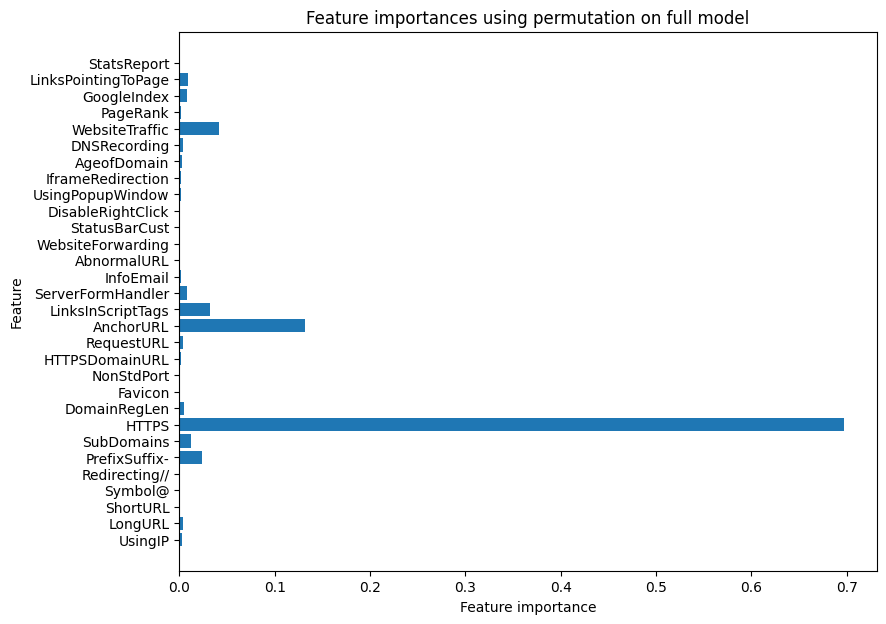

In [266]:
# kiểm tra tầm quan trọng của đặc trưng trong mô hình
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), gbc.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [267]:
import pickle

# Truyền thông mô hình RF tin vào tệp
pickle.dump(rf, open('pickle/model_rf.pkl', 'wb'))

In [276]:
import pickle

# Truyền thông mô hình SVM tin vào tệp
pickle.dump(svm, open('pickle/model_svm.pkl', 'wb'))